In [1]:
#load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


happinessData = pd.read_csv('world-happiness-report-2019.csv')

In [2]:
happinessData.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [3]:
happiness_nulls = happinessData.isnull().sum().sum()   

# print total count
print(f"Total null values in happiness Data: {happiness_nulls}")

Total null values in happiness Data: 23


In [4]:
null_columns = happinessData.isnull().sum()
print(null_columns[null_columns > 0])

Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64


In [5]:
# Get the exact positions of null values (row, column)
null_positions = happinessData.isnull()
print(null_positions[null_positions].stack())

20   Corruption                  True
24   Log of GDP\nper capita      True
     Healthy life\nexpectancy    True
27   Corruption                  True
28   Positive affect             True
     Negative affect             True
     Social support              True
     Freedom                     True
     Corruption                  True
     Generosity                  True
36   Corruption                  True
45   Healthy life\nexpectancy    True
50   Corruption                  True
63   Log of GDP\nper capita      True
     Healthy life\nexpectancy    True
75   Healthy life\nexpectancy    True
86   Corruption                  True
92   Corruption                  True
100  Corruption                  True
109  Healthy life\nexpectancy    True
111  Log of GDP\nper capita      True
134  Healthy life\nexpectancy    True
148  Log of GDP\nper capita      True
dtype: object


In [6]:
# Get columns
column_data = {}

# Loop through each column and save its values as a list
for column in happinessData.columns:
    column_data[column] = np.array(happinessData[column])

In [7]:
happinessData = happinessData.dropna()

In [9]:
countries = happinessData['Country (region)'].values
ladder = happinessData['Ladder'].values
sdLadder = happinessData['SD of Ladder'].values
posAffect = happinessData['Positive affect'].values
negAffect = happinessData['Negative affect'].values
socialSupport = happinessData['Social support'].values
freedom = happinessData['Freedom'].values
corruption = happinessData['Corruption'].values
generosity = happinessData['Generosity'].values

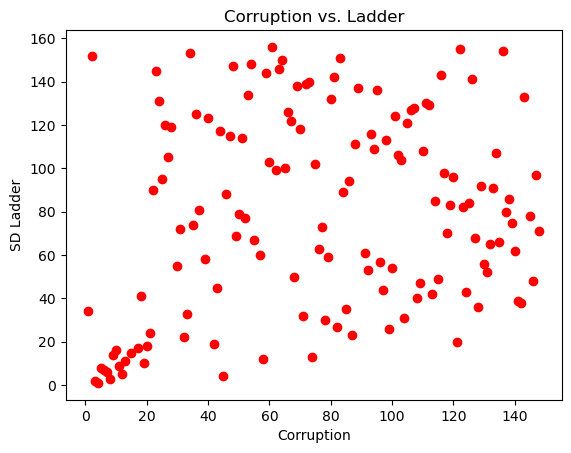

0.22439426243679134

In [10]:
plt.scatter(corruption, ladder, color='red')
plt.title("Corruption vs. Ladder")
plt.xlabel("Corruption")
plt.ylabel("SD Ladder")
plt.show()
np.corrcoef(corruption, ladder)[0,1]

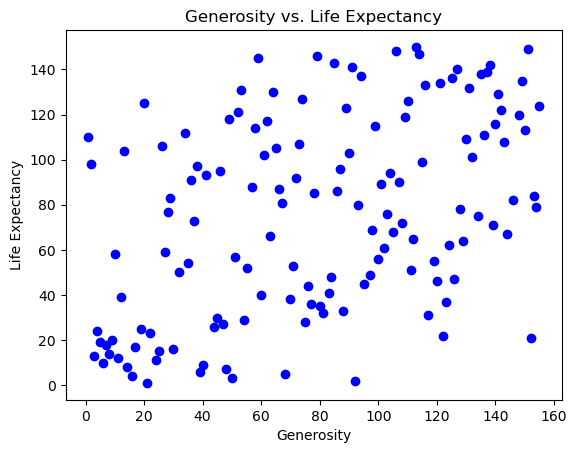

0.4531353972826464

In [18]:
lifeExpectancy = happinessData['Healthy life\nexpectancy'].values
plt.scatter(generosity, lifeExpectancy, color='blue')
plt.title("Generosity vs. Life Expectancy")
plt.xlabel("Generosity")
plt.ylabel("Life Expectancy")
plt.show()
np.corrcoef(generosity, lifeExpectancy)[0,1]

In [39]:
lower_gdp_countries = happinessData.loc[happinessData["Log of GDP\nper capita"] >= 77]
lower_gdp_countries.describe().loc["mean"].sort_values(ascending=True).filter(items=['Freedom', 'Generosity', 'Healthy life\nexpectancy', 'Social support'])

Freedom                      88.555556
Generosity                   91.430556
Healthy life\nexpectancy    106.888889
Social support              107.152778
Name: mean, dtype: float64

Text(0, 0.5, 'Ladder')

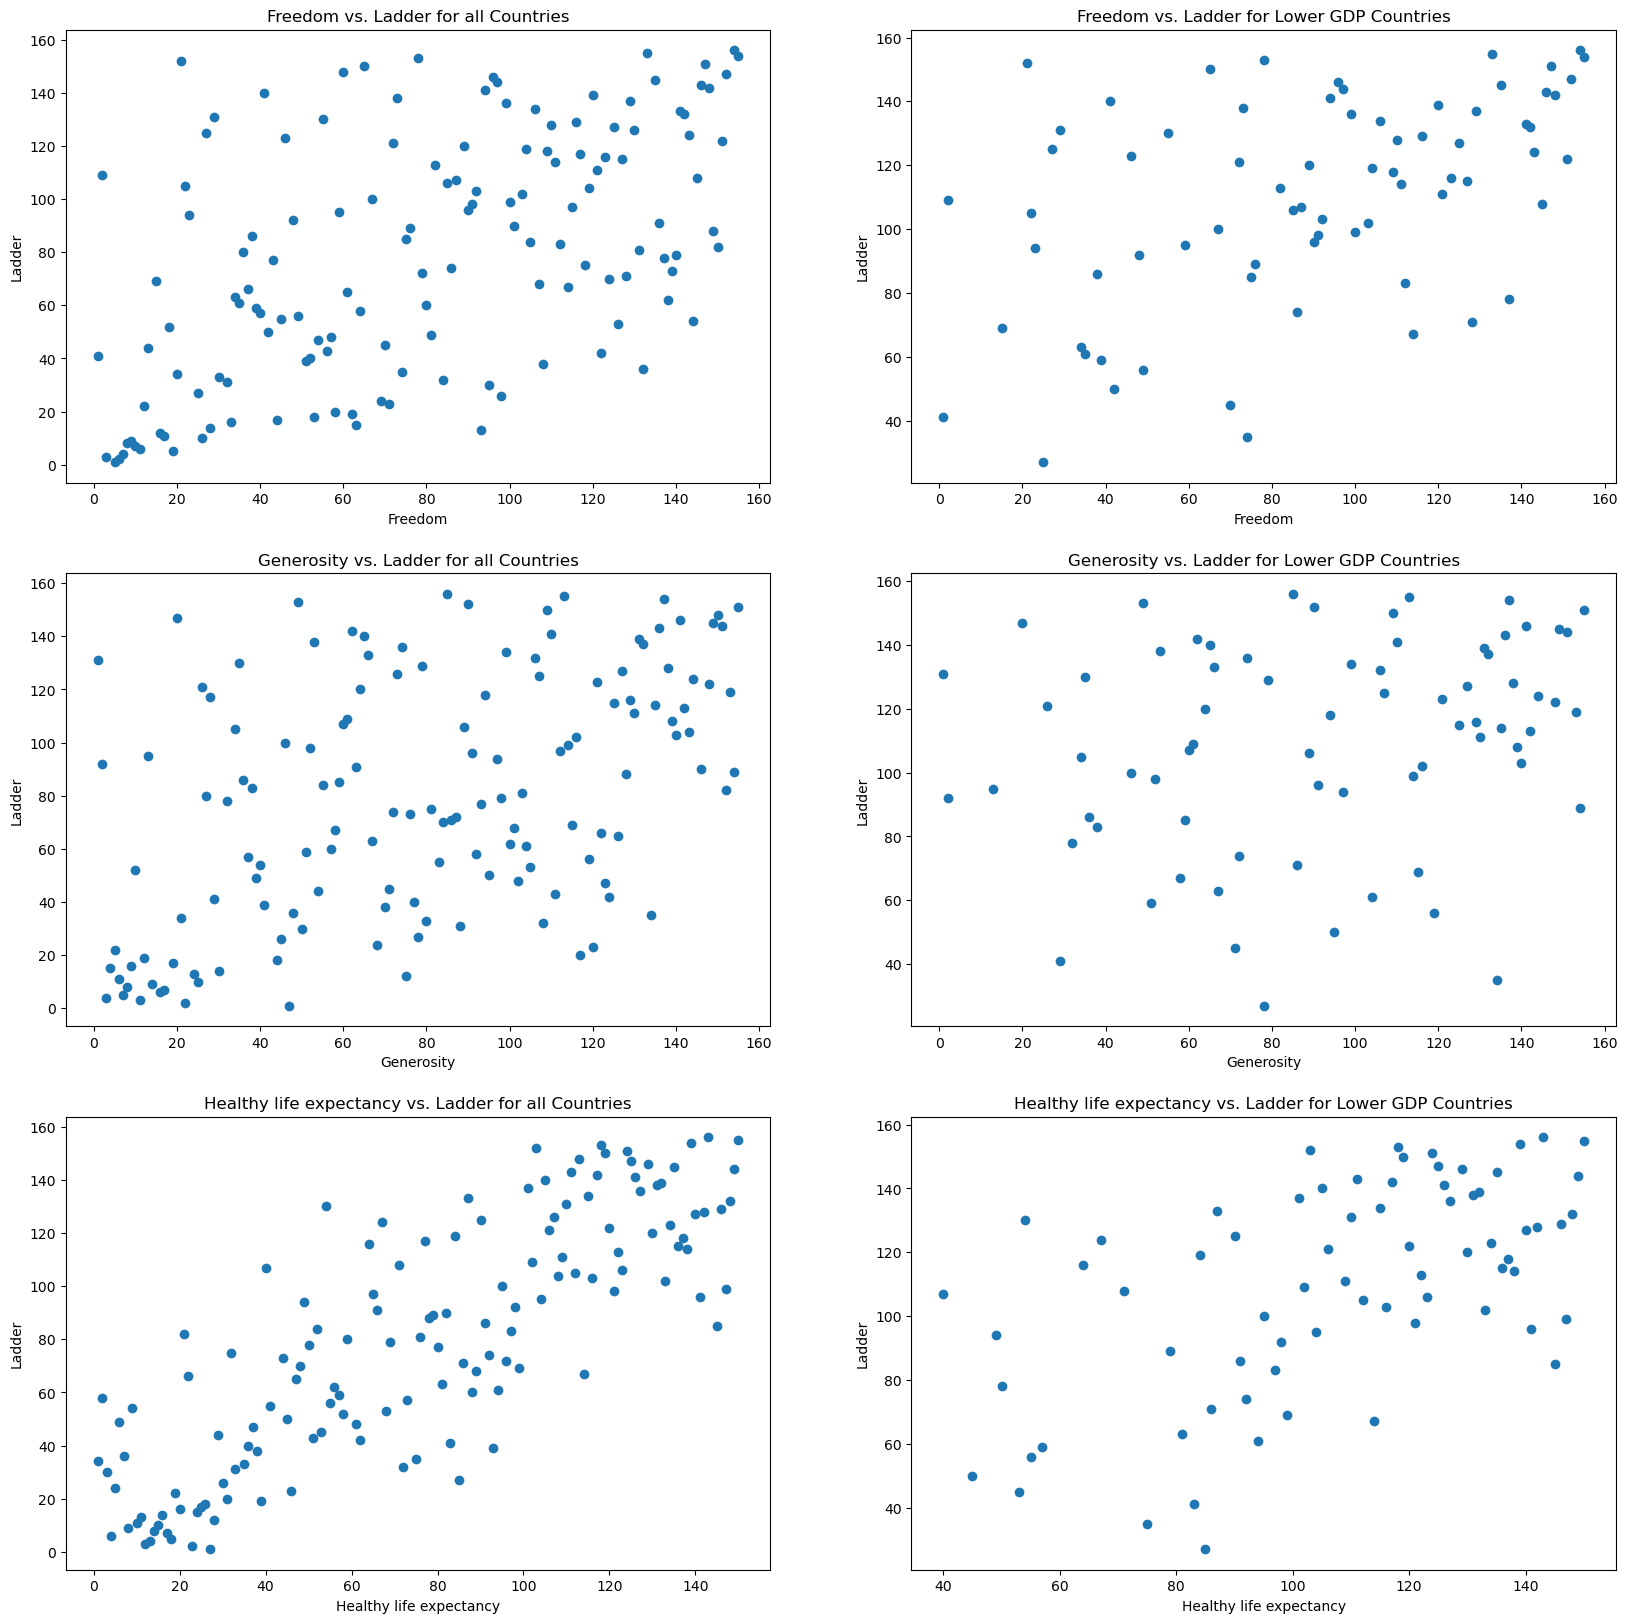

In [54]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
axs[0,0].scatter(happinessData["Freedom"], happinessData["Ladder"])
axs[0,0].set_title("Freedom vs. Ladder for all Countries")
axs[0,0].set_xlabel("Freedom")
axs[0,0].set_ylabel("Ladder")
axs[0,1].scatter(lower_gdp_countries["Freedom"], lower_gdp_countries["Ladder"])
axs[0,1].set_title("Freedom vs. Ladder for Lower GDP Countries")
axs[0,1].set_xlabel("Freedom")
axs[0,1].set_ylabel("Ladder")
axs[1,0].scatter(happinessData["Generosity"], happinessData["Ladder"])
axs[1,0].set_title("Generosity vs. Ladder for all Countries")
axs[1,0].set_xlabel("Generosity")
axs[1,0].set_ylabel("Ladder")
axs[1,1].scatter(lower_gdp_countries["Generosity"], lower_gdp_countries["Ladder"])
axs[1,1].set_title("Generosity vs. Ladder for Lower GDP Countries")
axs[1,1].set_xlabel("Generosity")
axs[1,1].set_ylabel("Ladder")
axs[2,0].scatter(happinessData["Healthy life\nexpectancy"], happinessData["Ladder"])
axs[2,0].set_title("Healthy life expectancy vs. Ladder for all Countries")
axs[2,0].set_xlabel("Healthy life expectancy")
axs[2,0].set_ylabel("Ladder")
axs[2,1].scatter(lower_gdp_countries["Healthy life\nexpectancy"], lower_gdp_countries["Ladder"])
axs[2,1].set_title("Healthy life expectancy vs. Ladder for Lower GDP Countries")
axs[2,1].set_xlabel("Healthy life expectancy")
axs[2,1].set_ylabel("Ladder")

This visualization actually shows the opposite of what I thought it would. It demonstrates that when you remove the higher GDP countries it actually
weakens all of the relationships, so my hypothesis was inherently flawed.